### Linear Regression Assignment-16102021-V0.6

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport
import pickle

boston = load_boston()
data = pd.DataFrame(boston.data)

In [10]:
data.columns=boston.feature_names

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


###### CRIM per capita crime rate by town
###### ZN proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS proportion of non-retail business acres per town
###### CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
###### NOX nitric oxides concentration (parts per 10 million)
###### RM average number of rooms per dwelling
###### AGE proportion of owner-occupied units built prior to 1940
###### DIS weighted distances to five Boston employment centres
###### RAD index of accessibility to radial highways
###### TAX full-value property-tax rate per 10,000usd
###### PTRATIO pupil-teacher ratio by town
###### B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### LSTAT % lower status of the population

In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
data['PRICE'] = boston.target

In [15]:
a = ProfileReport(data)
a.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
data.shape

(506, 14)

In [18]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [19]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [20]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
X = data.drop("PRICE",axis=1)   #Feature Matrix
y = data["PRICE"]

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

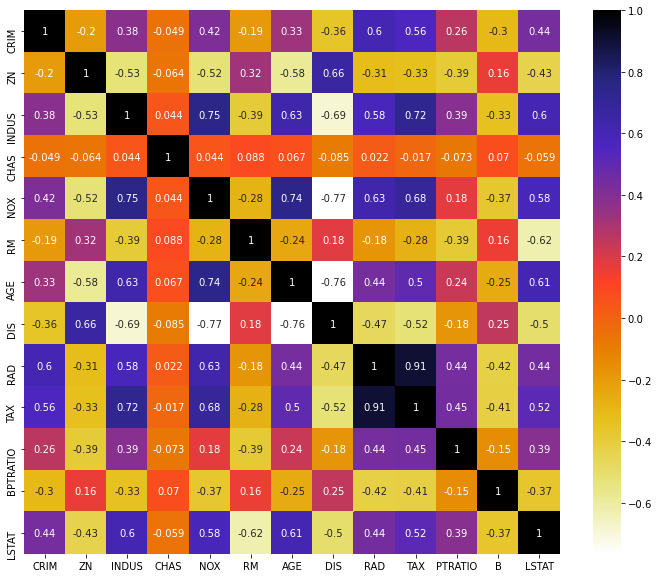

In [24]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [25]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [27]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [28]:
X_train.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,5.019,4.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,6.538,3.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,6.335,4.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,6.345,5.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,5.961,2.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,5.708,5.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,7.178,5.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,6.021,6.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,6.030,3.0,17.9,392.74,18.80


In [29]:
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


## Linear Regression

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()
mse=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=10)
mean_mse=np.mean(mse)
mean_mse

-34.705255944524936

##### The MSE sholud be nearer to Zero for best model performace

## RIDGE Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [34]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-2,1,2,5,9,10,20,30,50,60,70,80,100,200,250,300]}
ridge_regg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regg.fit(X,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 9, 10,
                                   20, 30, 50, 60, 70, 80, 100, 200, 250,
                                   300]},
             scoring='neg_mean_squared_error')

In [35]:
ridge_regg.best_score_

-29.829124288555438

In [36]:
ridge_regg.best_params_

{'alpha': 200}

In [37]:
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [38]:
ridge_regg.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]])[0]

31.279231028834076

In [49]:
# saving the model to the local file system
import pickle
filename = 'boston_linear.pickle'
pickle.dump(ridge_regg, open(filename, 'wb'))

In [50]:
loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
loaded_model.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]])[0]

31.279231028834076

## Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-2,1,2,5,9,10,20,30,50,60,70,80,100,200,250,300]}
lasso_regg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 9, 10,
                                   20, 30, 50, 60, 70, 80, 100, 200, 250,
                                   300]},
             scoring='neg_mean_squared_error')

In [41]:
lasso_regg.best_score_

-35.53158022069486

In [42]:
lasso_regg.best_params_

{'alpha': 1}

We see that the Ridge Reggressor has less MSE value.

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [46]:
lasso_pred=lasso_regg.predict(X_test)
ridge_pred=ridge_regg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

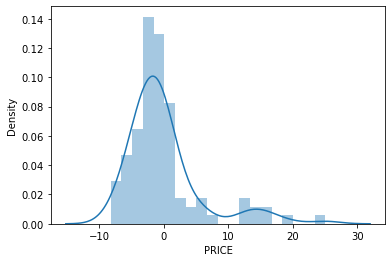

In [47]:
sns.distplot(y_test-lasso_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

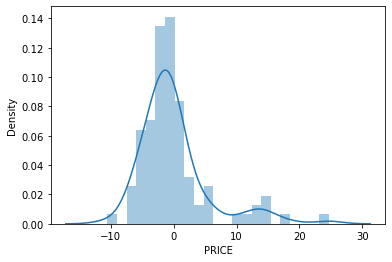

In [48]:
sns.distplot(y_test-ridge_pred)